# Portfolio Creation

We will look to create an optimized portfolio based on mean-variance preferences using the Markowitz optimization. This is by no means the only way ot create a portfolio and is definitely not the best way to create a portfolio. That being said mean-variance preferences are generally understood to be the norm for a rational investor and are foundation concepts to portfolio theory. In this workshop we will assume:

1. We have already done our security selection
2. We are a risk-averse investor interested in maximizing our risk-return
3. We are looking to allocate capital to stocks only

From these assumptions we will create a model by which we can define the weights we should allocate to each stock in our portfolio. Investors tend to beileve they are able to predict, or at least anticipate certain return and volatility levels given the history of the asset and their views on a given company. What investors need Markowtiz for is how to allocate their portfolio considering these anticipated levels of return and risk. We will look to build a portfolio on the efficient frontier given by the Markowitz optimiation, to look for an optimal Sharpe Ratio.

In [34]:
import pandas_datareader.data as web
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2021,3,30)

In [36]:
# Bulding a FAANG portfolio
facebook = web.DataReader("FB", 'yahoo', start,end)
apple = web.DataReader("AAPL", 'yahoo', start,end)
amazon = web.DataReader("AMZN", 'yahoo', start,end)
netflix = web.DataReader("NFLX", 'yahoo', start,end)
google = web.DataReader("GOOGL", 'yahoo', start,end)

In [37]:
facebook.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999


In [39]:
stocks = pd.concat([facebook['Adj Close'],
                    apple['Adj Close'],
                    amazon['Adj Close'],
                    netflix['Adj Close'],
                    google['Adj Close']], axis = 1)

stocks.columns = ["Facebook","Apple","Amazon","Netflix","Google"]

In [41]:
stocks.tail()

,Facebook,Apple,Amazon,Netflix,Google
Date,,,,,
2021-03-24,282.140015,120.089996,3087.070068,520.809998,2032.530029
2021-03-25,278.739990,120.589996,3046.260010,502.859985,2032.459961
2021-03-26,283.019989,121.209999,3052.030029,508.049988,2024.729980
2021-03-29,290.820007,121.389999,3075.729980,513.950012,2045.790039
2021-03-30,288.000000,119.900002,3055.290039,513.390015,2046.469971


# Defining Returns
To define returns of a particular portoflio in pandas we can use
our general return formula:

- $r_t = \frac{p_t}{p_{t-1}} -1$


In [26]:
returns = stocks/stocks.shift(1)
returns.tail()

,Facebook,Apple,Amazon,Netflix,Google
Date,,,,,
2021-03-24,0.970788,0.980006,0.983927,0.973313,0.995689
2021-03-25,0.987949,1.004164,0.986780,0.965534,0.999966
2021-03-26,1.015355,1.005141,1.001894,1.010321,0.996197
2021-03-29,1.027560,1.001485,1.007765,1.011613,1.010401
2021-03-30,0.990303,0.987726,0.993354,0.998910,1.000332


## Using log returns

Computing returns is mathemtically the same thing as log returns. To compute log returns we take the log of the ratio of the prices:

$ logreturn = log(\frac{p_t}{p_{t-1}})$

Take for example:

- $p_t = 102$ 
- $p_{t-1} = 100$
- $log(\frac{p_t}{p_{t-1}}) = 0.02$

In [42]:
logReturns = np.log(returns)
logReturns.tail()

,Facebook,Apple,Amazon,Netflix,Google
Date,,,,,
2021-03-24,-0.029648,-0.020196,-0.016204,-0.027050,-0.004320
2021-03-25,-0.012124,0.004155,-0.013308,-0.035074,-0.000034
2021-03-26,0.015238,0.005128,0.001892,0.010268,-0.003811
2021-03-29,0.027187,0.001484,0.007735,0.011546,0.010348
2021-03-30,-0.009744,-0.012350,-0.006668,-0.001090,0.000332


# Sharpe Ratio
William Sharpe, an american economist  is most well known for the Sharpe Ratio, the ratio of the diffrence between expected return and risk free rate to volatiltiy of the portfolio. It is the amount of return in excess of the risk free rate one can earn by adding an additional unit of risk to his/her portfolio.

1. What is the Sharpe Ratio?

$$SR = \frac{E(R) - R_f}{\sigma}$$

2. More generally, given a vector of weights

$$ w = [w_1, w_2 ... w_{n-1}, w_n]$$

$$SR(w) = \frac{E(R)(w) - R_f}{\sigma(w)}$$

$$\sum\limits_{k=1}^n (w_k) = 1$$


What we will be trying to do is maximize this Sharpe Ratio, effecitvely maximizing the amount of return we expect per unit of risk we take on. To calculate the return of the portfolio for a given day, we multiply the transpose of the weight vector by the returns of each stock:

$$ R_p = w^T log(r) $$

We know the standard deviation of the portfolio to be the covaraince matrix of the log returns. We can compute this covariance matrix:

$$ \sigma(w) = \sqrt{(w^T)\sum(w)} $$

$$ SR(w) = \frac{w^T log(r)}{(w^T)\sum(w)} $$



# Return to Volatility Chart

The return to volatility chart is a chart of expected return and risk for almost all possible portfolios made from the stocks we chose. Remember, the portfolios we can make are effectively the possible vectors $w$ we can choose.

In [28]:
# Determine amount of portfolios to generate 
noOfPortfolios = 10000

# Initialize a noOfPortfolios by number of stocks matrix 
weight = np.zeros((noOfPortfolios, 5))

#Initialize 3 arrays of zeros
expectedReturn = np.zeros(noOfPortfolios)
expectedVolatility = np.zeros(noOfPortfolios)
sharpeRatio = np.zeros(noOfPortfolios)

# Create a variable to get the mean log return
meanLogRet = logReturns.mean()

# Create a variable to get the covariance matrix
Sigma = logReturns.cov()

for k in range(noOfPortfolios):
    
    #generate a random weight vector
    w = np.array(np.random.random(5))
    
    #make weights sum up to 1
    w = w / np.sum(w)
    
    # save the weight vector
    weight[k,:] = w
    
    # Expected log Return
    expectedReturn[k] = np.sum( meanLogRet * w )
    
    #Expected Volatility
    expectedVolatility[k] = np.sqrt(np.dot(w.T,np.dot(Sigma,w)))
    
    #Sharpe Ratio per portfolio
    sharpeRatio[k] = expectedReturn[k]/expectedVolatility[k]

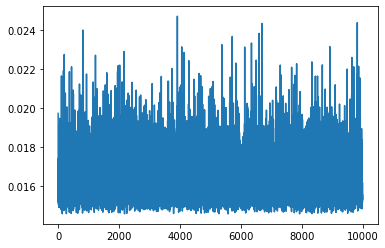

In [43]:
plt.plot(expectedVolatility)
plt.show()

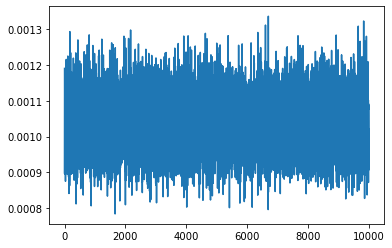

In [44]:
plt.plot(expectedReturn)
plt.show()

In [46]:
#We figure out the w that maximizes the sharpe ratio
maxIndex = sharpeRatio.argmax()
weight[maxIndex,:]

array([7.72260502e-02, 4.54698157e-01, 3.19082363e-01, 1.48985293e-01,
       8.13722323e-06])

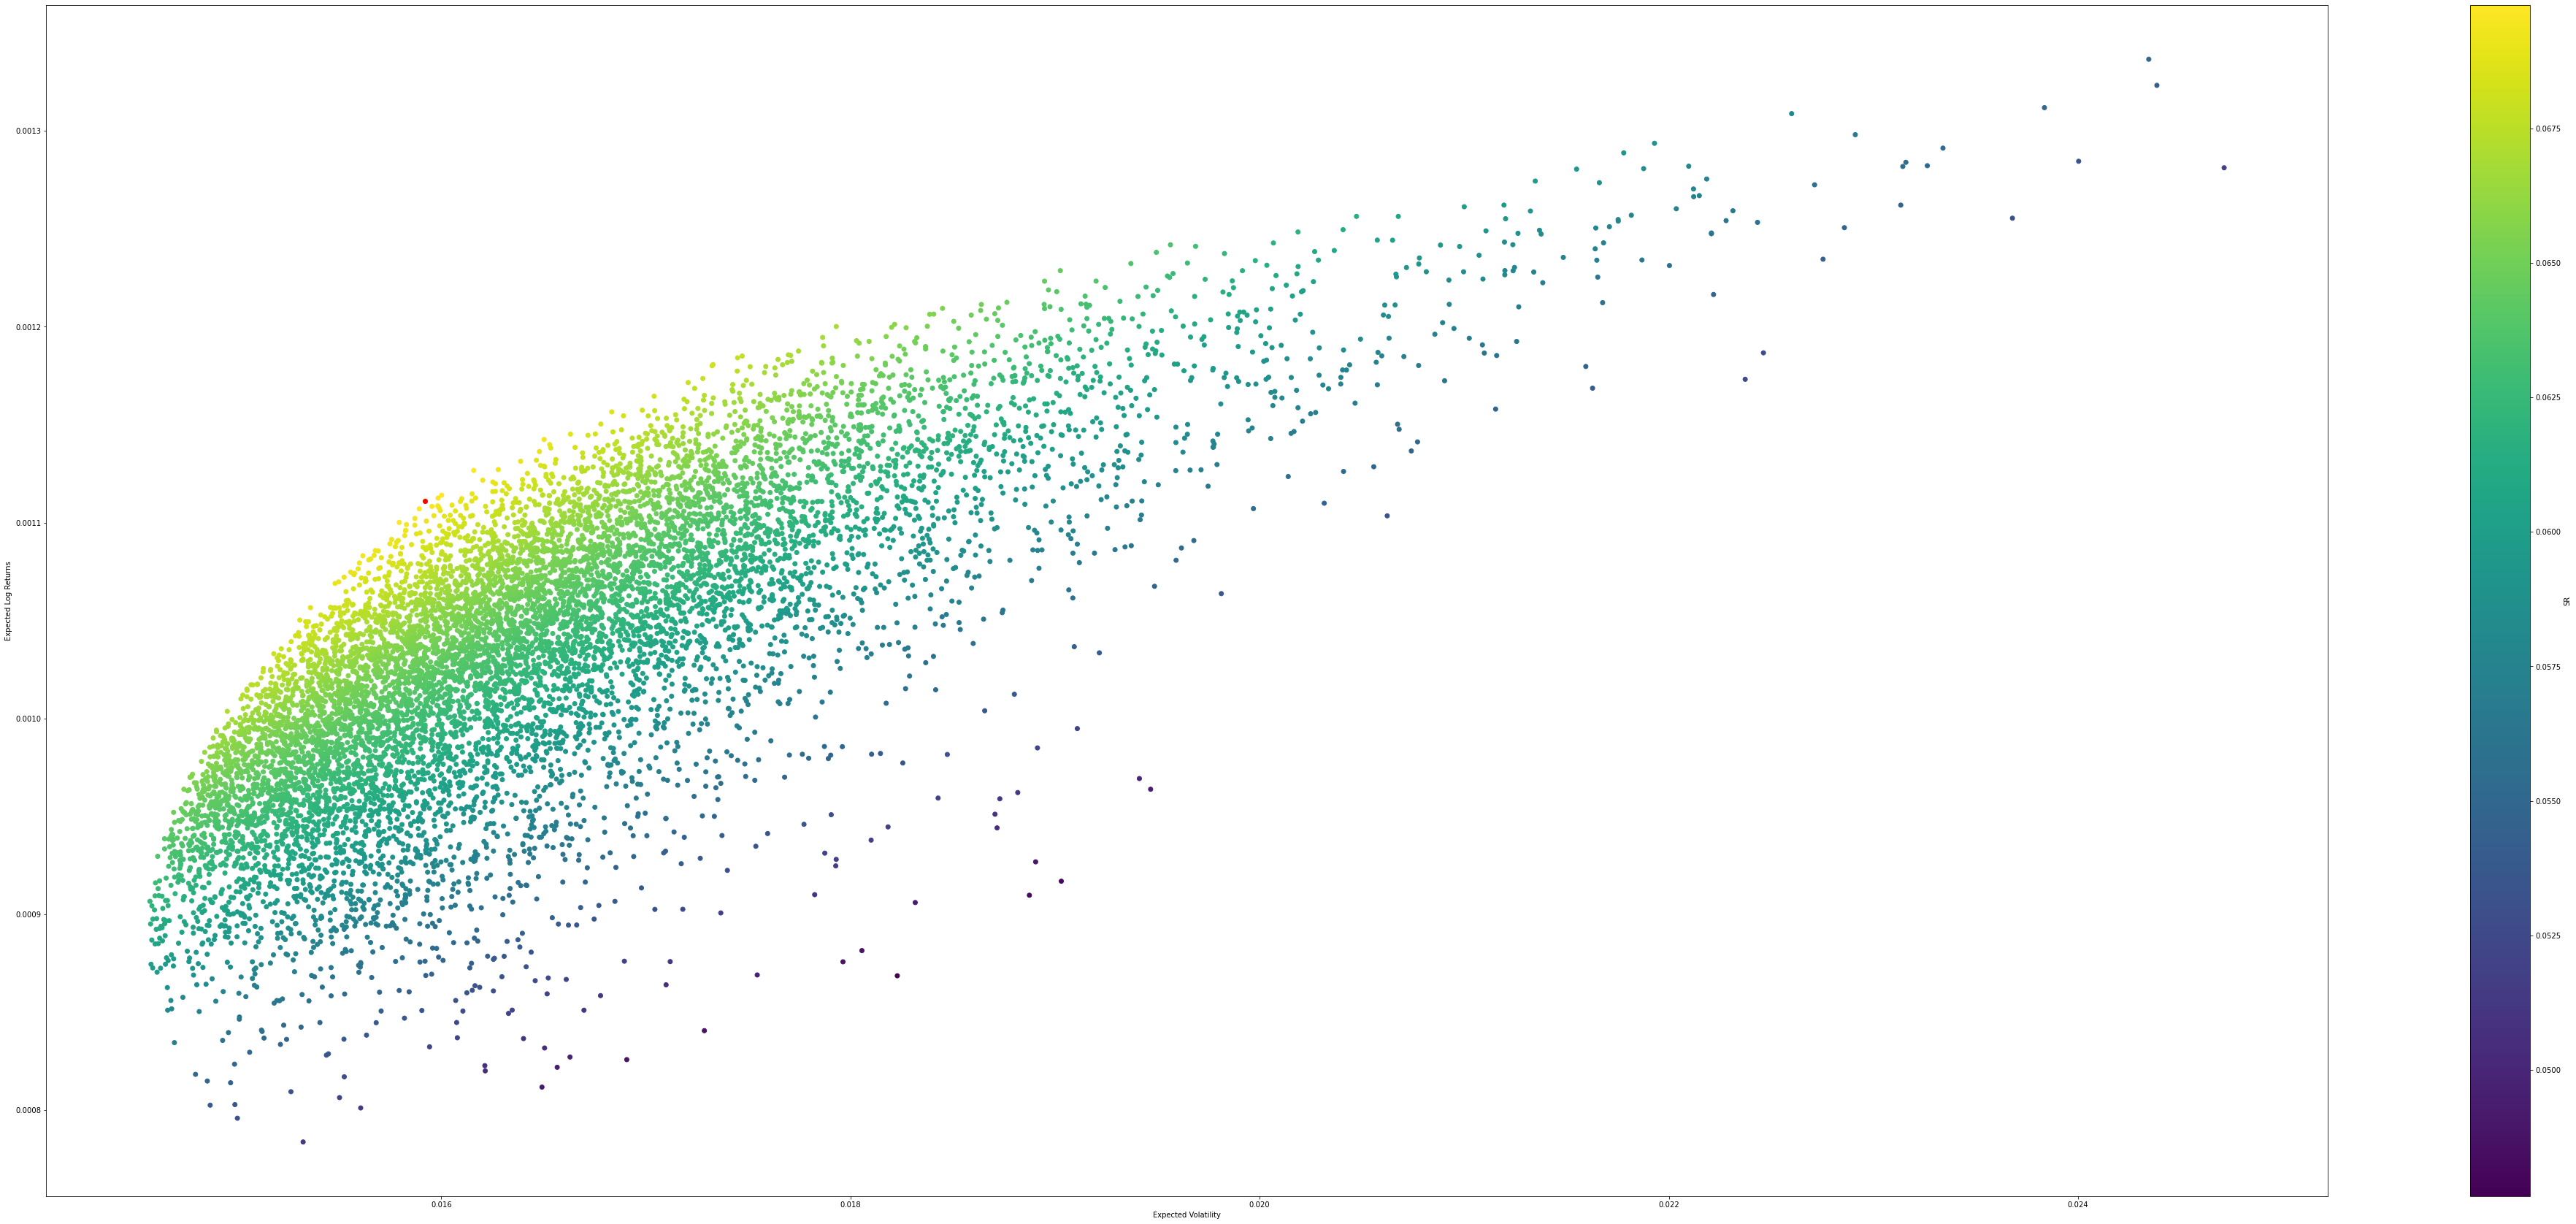

In [47]:
# We can plot a scatterplot of the expected volatility and return
plt.figure(figsize = (70,30))
plt.scatter(expectedVolatility,expectedReturn, c = sharpeRatio)

# Set desgin parameters
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Log Returns')
plt.colorbar(label = 'SR')
plt.scatter(expectedVolatility[maxIndex],expectedReturn[maxIndex],c = 'red')
plt.show()

In [48]:
summ = 0
stock = 1
for element in weight[maxIndex,:]:
    print("Our weight in stock", stock, "is", (round(float(element),3))*100,"%")
    stock += 1
    summ += element

Our weight in stock 1 is 7.7 %
Our weight in stock 2 is 45.5 %
Our weight in stock 3 is 31.900000000000002 %
Our weight in stock 4 is 14.899999999999999 %
Our weight in stock 5 is 0.0 %


# Efficient Markowitz Frontier

We are looking to find the vector w that will minimize the risk given a certain constraint. What is that constraint? Well we want to guarantee a certain level of expected return:

$$ min(w^T) \sum(w) $$
subject to 
$$ p^{-T}w \geq r_min$$
$$ w \geq 0 $$
$$ 1^T w = 1 $$


In [72]:
#Use scipy minimize function
from scipy.optimize import minimize

def negativeSR(w):
    w = np.array(w)
    R = np.sum(meanLogRet*w)
    V = np.sqrt( np.dot(w.T,np.dot(Sigma,w)))
    SR = R/V
    return -1*SR

def checkSumToOne(w):
    return np.sum(w)-1

w0 = [1/5,1/5,1/5,1/5,1/5]
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1))
constraints = ({'type':'eq', 'fun':checkSumToOne})

w_opt = minimize(negativeSR, w0, method = 'SLSQP', bounds = bounds, constraints = constraints)

w_opt

     fun: -0.06985568031764361
     jac: array([-9.44826752e-05, -2.29481608e-04,  2.66952440e-04,  1.66229904e-04,
        5.16062602e-03])
 message: 'Optimization terminated successfully'
    nfev: 48
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.05224556, 0.46561583, 0.31413838, 0.16800023, 0.        ])

In [73]:
w_opt.x

array([0.05224556, 0.46561583, 0.31413838, 0.16800023, 0.        ])

In [71]:
summ = 0
stock = 1
for element in w_opt.x:
    print("Our weight in stock", stock, "is", round(float(element),3)*100,"%")
    stock += 1
    summ += element

print("Notice, weights sum up to", summ)

Our weight in stock 1 is 5.2 %
Our weight in stock 2 is 46.6 %
Our weight in stock 3 is 31.4 %
Our weight in stock 4 is 16.8 %
Our weight in stock 5 is 0.0 %
Notice, weights sum up to 1.0
